# 1. Load Data
------

In [1]:
!pip install kagglehub[pandas-datasets]
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [2]:
import kagglehub
import os
# Store the path of the Kaggle dataset
path = kagglehub.dataset_download("jonassouza872/vitoria-da-conquista-weather-data-september")
print(path)# Check if the path is correct

# List all files inside the downloaded folder
print(os.listdir(path))

100%|██████████| 1.54M/1.54M [00:00<00:00, 68.0MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/jonassouza872/vitoria-da-conquista-weather-data-september/versions/1
['temp.csv']


In [3]:
import pandas as pd
df = pd.read_csv(f"{path}/temp.csv")  # Reads the declared path as a CSV file
df.head()  # Prints the first 5 rows of the dataset

,Timestamp,Temp_MPU6050_C,Temp_AHT20_C,Umid_AHT20_pct,Temp_BMP280_C,Press_BMP280_hPa,Temp_BMP180_C,Press_BMP180_hPa,Temp_DS18B20_C,Temp_NTC_C,Temp_DHT11_C,Umid_DHT11_pct
0,2025-08-31 22:31:02,20.86,19.90,73.37,21.28,921.24,20.19,923.02,25.69,22.26,20.03,66.0
1,2025-08-31 22:31:33,21.75,19.97,75.57,21.48,921.12,20.27,923.04,23.81,20.73,20.02,66.0
2,2025-08-31 22:32:05,21.80,19.75,74.31,21.25,921.20,20.16,923.06,22.50,20.88,20.02,67.0
3,2025-08-31 22:32:36,21.57,19.55,74.77,21.07,921.15,20.06,922.99,21.31,20.62,20.01,66.0
4,2025-08-31 22:33:07,21.66,19.60,75.09,21.12,921.25,20.06,923.02,21.88,20.95,20.00,66.0


In [4]:
df.columns #all columns

Index(['Timestamp', 'Temp_MPU6050_C', 'Temp_AHT20_C', 'Umid_AHT20_pct',
       'Temp_BMP280_C', 'Press_BMP280_hPa', 'Temp_BMP180_C',
       'Press_BMP180_hPa', 'Temp_DS18B20_C', 'Temp_NTC_C', 'Temp_DHT11_C',
       'Umid_DHT11_pct'],
      dtype='object')

# 2. Missing_Data_Analysis

-------------------

## 2.1.Missing Data Mapping

---------------

Task: Visualize and analyze the missing data pattern by plotting missing values and calculating the percentage of missing data per sensor.

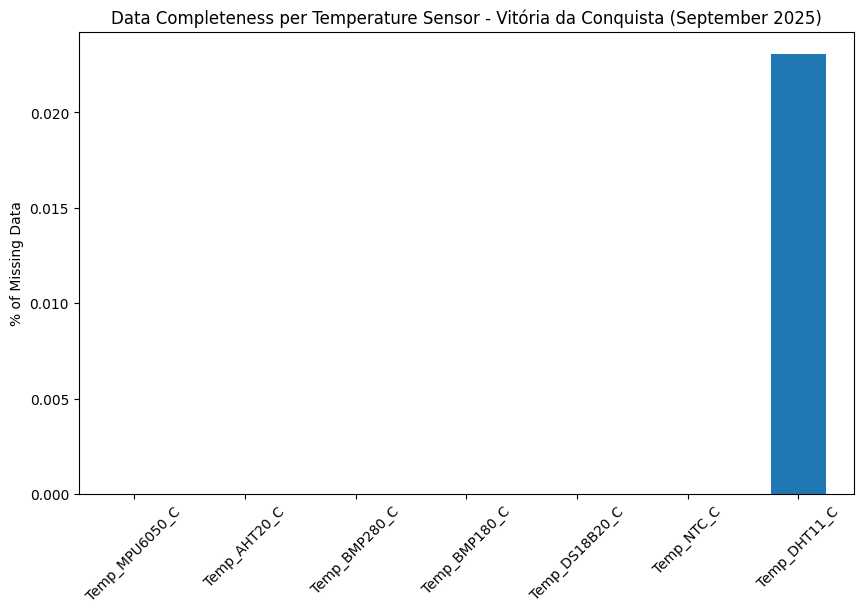

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

temp_sensors = [ #all sensors
    'Temp_MPU6050_C',
    'Temp_AHT20_C',
    'Temp_BMP280_C',
    'Temp_BMP180_C',
    'Temp_DS18B20_C',
    'Temp_NTC_C',
    'Temp_DHT11_C',
]
temp_existing = [col for col in temp_sensors if col in df.columns]# Ensures that only existing columns are used
missing_pct = (df[temp_existing].isnull().sum() / len(df)) * 100 #Calculates % of missing data

# Plot the bar chart
missing_pct.plot(kind='bar', figsize=(10, 6)) #plots the % of missing data per sensor
plt.ylabel('% of Missing Data')
plt.title('Data Completeness per Temperature Sensor - Vitória da Conquista (September 2025)')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Print table with missing data percentage
print("=== Missing Data Percentage per Temperature Sensor ===")
print(missing_pct.to_frame('Missing (%)').round(6))
print("======================================================")

=== Missing Data Percentage per Temperature Sensor ===
                Missing (%)
Temp_MPU6050_C      0.00000
Temp_AHT20_C        0.00000
Temp_BMP280_C       0.00000
Temp_BMP180_C       0.00000
Temp_DS18B20_C      0.00000
Temp_NTC_C          0.00000
Temp_DHT11_C        0.02305


The analysis shows that all sensors achieved 100% data completeness, except for the DHT11, which had only 0.02305% missing data, equivalent to about 19 missing readings out of 82,430 records. This small loss is normal for the DHT11, as it has lower precision and stability compared to other sensors. The missing values may have been caused by electrical noise, communication instability, or temporary read delays. This percentage is considered statistically insignificant and does not affect the overall data analysis. However, it is advisable to monitor the sensor’s consistency in future data collections.

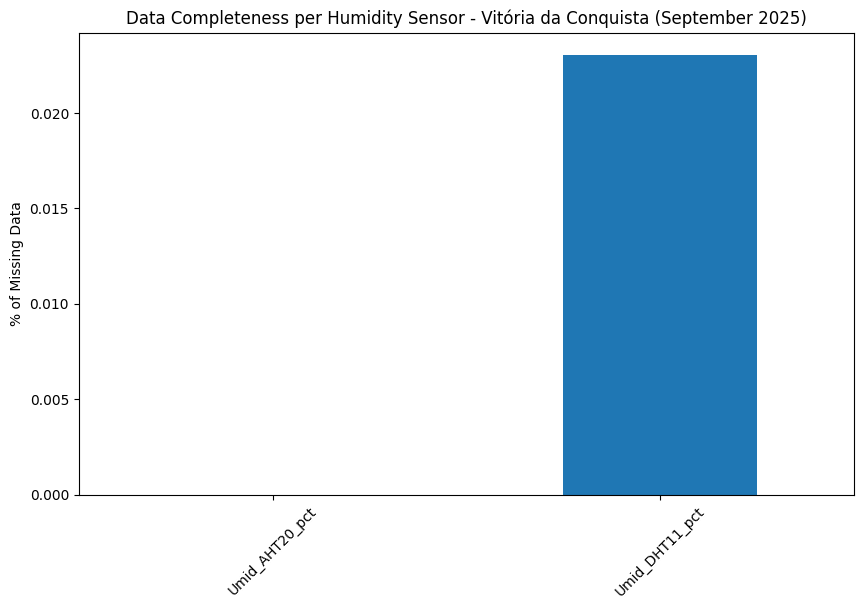

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

umid_sensors = [ #all sensors
    'Umid_AHT20_pct',
    'Umid_DHT11_pct',
]
umid_existing = [col for col in umid_sensors if col in df.columns]# Ensures that only existing columns are used
missing_pct = (df[umid_existing].isnull().sum() / len(df)) * 100 #Calculates % of missing data

# Plot the bar chart
missing_pct.plot(kind='bar', figsize=(10, 6)) #plots the % of missing data per sensor
plt.ylabel('% of Missing Data')
plt.title('Data Completeness per Humidity Sensor - Vitória da Conquista (September 2025)')
plt.xticks(rotation=45)
plt.show()

The humidity analysis shows the same pattern observed in the temperature sensors: all sensors reported complete data, except for the DHT11, which had 0.02305% missing values. This consistency confirms that the issue is not related to the data processing or acquisition system but rather to the sensor’s inherent limitations. The DHT11 tends to show minor read failures in both temperature and humidity due to its lower sampling stability, communication timing issues, or environmental interferences. The small percentage of missing data (around 19 records out of 82,430) is negligible and does not significantly affect data reliability, but it’s advisable to keep monitoring this sensor in future tests.

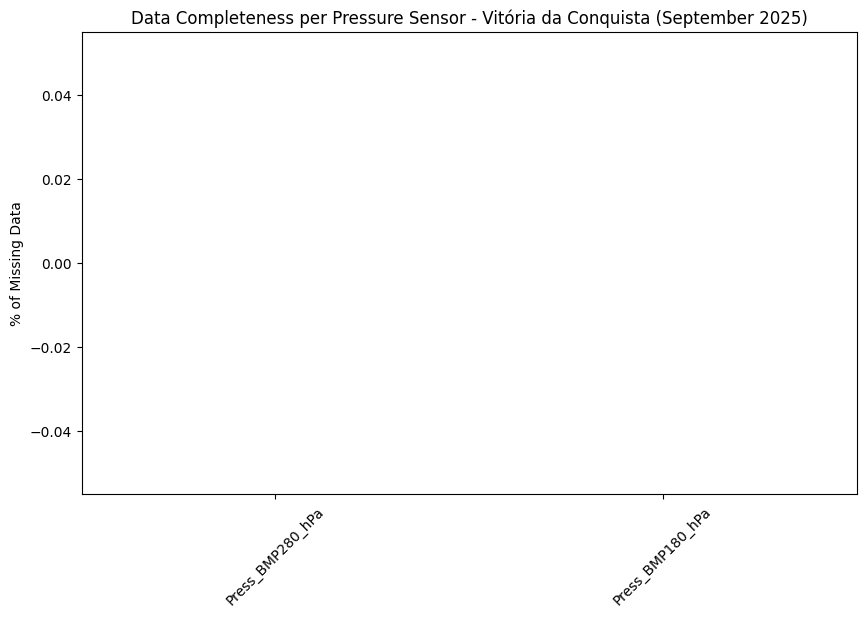

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

press_sensors = [ #all sensors
    'Press_BMP280_hPa',
    'Press_BMP180_hPa',
]
press_existing = [col for col in press_sensors if col in df.columns]# Ensures that only existing columns are used
missing_pct = (df[press_existing].isnull().sum() / len(df)) * 100 #Calculates % of missing data

# Plot the bar chart
missing_pct.plot(kind='bar', figsize=(10, 6)) #plots the % of missing data per sensor
plt.ylabel('% of Missing Data')
plt.title('Data Completeness per Pressure Sensor - Vitória da Conquista (September 2025)')
plt.xticks(rotation=45)
plt.show()

The analysis of the pressure sensors shows that both BMP280 and BMP180 maintained complete datasets, with 0% missing values across all 82,430 records. This indicates high reliability and stable communication during data acquisition. The absence of missing data suggests that these sensors operated under consistent environmental and electrical conditions, without interruptions or read failures. Compared to the DHT11, which showed minor data loss, the BMP series demonstrates superior accuracy and robustness in pressure measurement. Therefore, the pressure dataset can be considered fully complete and highly dependable for further analysis.

In [21]:
import pandas as pd

# Identify missing data in DHT11 sensors
dht11_temp_missing = df[df['Temp_DHT11_C'].isnull()]['Timestamp']
dht11_umid_missing = df[df['Umid_DHT11_pct'].isnull()]['Timestamp']

# Display results
print("=== DHT11 Missing Data Analysis ===")
print(f"Total temperature missing readings: {len(dht11_temp_missing)}")
print(f"Total humidity missing readings: {len(dht11_umid_missing)}")
print("\nTimestamps of missing temperature data:")
print(dht11_temp_missing.head(10).to_string(index=False))  # Show first 10 occurrences
print("\nTimestamps of missing humidity data:")
print(dht11_umid_missing.head(10).to_string(index=False))
print("===================================")


=== DHT11 Missing Data Analysis ===
Total temperature missing readings: 19
Total humidity missing readings: 19

Timestamps of missing temperature data:
2025-09-01 02:01:46
2025-09-04 09:43:00
2025-09-05 13:36:50
2025-09-08 16:28:15
2025-09-11 15:03:51
2025-09-15 12:31:14
2025-09-17 02:41:13
2025-09-18 08:17:32
2025-09-20 09:36:17
2025-09-21 02:14:15

Timestamps of missing humidity data:
2025-09-01 02:01:46
2025-09-04 09:43:00
2025-09-05 13:36:50
2025-09-08 16:28:15
2025-09-11 15:03:51
2025-09-15 12:31:14
2025-09-17 02:41:13
2025-09-18 08:17:32
2025-09-20 09:36:17
2025-09-21 02:14:15


The analysis shows that the DHT11 sensor had exactly 19 missing readings for both temperature and humidity, occurring at the same timestamps. This indicates that the failures happened simultaneously in both measurements, confirming that the issue was not related to the sensing elements themselves but rather to a communication interruption or temporary read failure in the sensor module.

The missing values are distributed over several days (from September 1 to September 21, 2025), suggesting sporadic and isolated faults instead of a continuous malfunction. Such behavior is typical of the DHT11, which is known for occasional timing or data transmission errors, especially under long-term operation or environmental interference. Overall, these brief interruptions have a minimal impact on the dataset’s integrity but highlight the importance of monitoring sensor stability during extended data collection.